## Daily Engagement by E-Commerce Company
### Exploratory Data Analysis (EDA)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/12/21 14:44:41 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/12/21 14:44:41 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


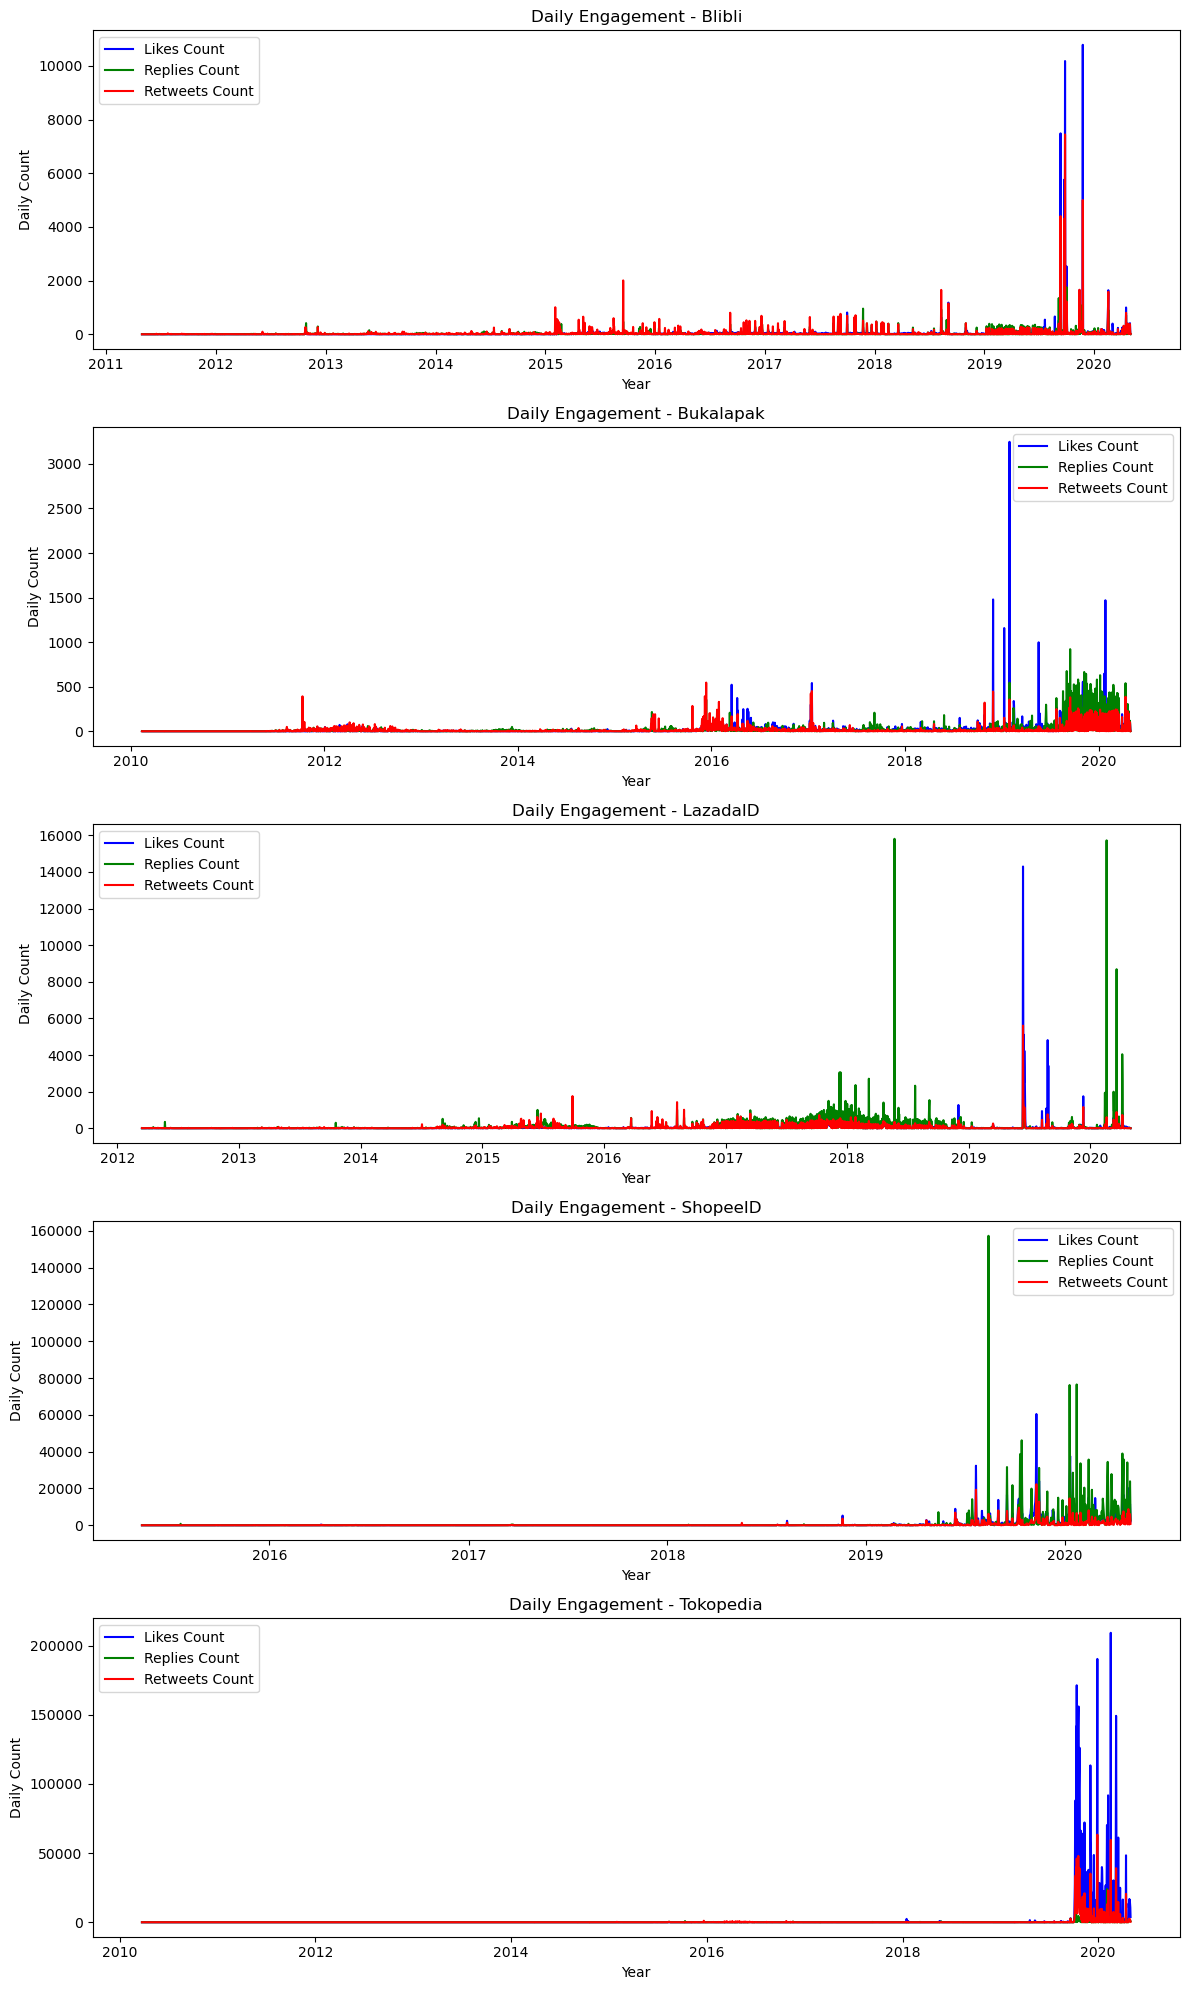

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

# 1. Start Spark Session
spark = SparkSession.builder.appName("Ecommerce Daily Engagement").getOrCreate()

# 2. Load datasets
blibli_df = spark.read.json('e-commerce/datasets/bliblidotcom.json')
bukalapak_df = spark.read.json('e-commerce/datasets/bukalapak.json')
lazadaID_df = spark.read.json('e-commerce/datasets/lazadaID.json')
shopeeID_df = spark.read.json('e-commerce/datasets/ShopeeID.json')
tokopedia_df = spark.read.json('e-commerce/datasets/tokopedia.json')

# 3. Function to process data and calculate daily counts
def calculate_daily_counts(df, source_name):
    # Validasi kolom waktu dan filter nilai null
    df = df.filter(F.col("date").isNotNull())
    
    # Konversi waktu ke format timestamp, lalu ambil tanggalnya
    daily_counts = (
        df.withColumn("date", F.to_date("date", "yyyy-MM-dd"))
          .groupBy("date")  # Group by date
          .agg(
              F.sum("likes_count").alias("daily_likes_count"),
              F.sum("replies_count").alias("daily_replies_count"),
              F.sum("retweets_count").alias("daily_retweets_count")
          )
          .orderBy("date")
    )
    return daily_counts.toPandas()  # Convert to Pandas DataFrame


# 4. Process each dataset
blibli_daily = calculate_daily_counts(blibli_df, "blibli")
bukalapak_daily = calculate_daily_counts(bukalapak_df, "bukalapak")
lazadaID_daily = calculate_daily_counts(lazadaID_df, "lazadaID")
shopeeID_daily = calculate_daily_counts(shopeeID_df, "shopeeID")
tokopedia_daily = calculate_daily_counts(tokopedia_df, "tokopedia")

# 5. Plot the data
def plot_daily_counts(df, title, ax):
    ax.plot(df['date'], df['daily_likes_count'], label="Likes Count", color="blue")
    ax.plot(df['date'], df['daily_replies_count'], label="Replies Count", color="green")
    ax.plot(df['date'], df['daily_retweets_count'], label="Retweets Count", color="red")
    ax.set_title(title)
    ax.set_xlabel("Year")
    ax.set_ylabel("Daily Count")
    ax.legend()

# Create subplots
fig, axs = plt.subplots(5, 1, figsize=(12, 20))

# Plot each source
plot_daily_counts(blibli_daily, "Daily Engagement - Blibli", axs[0])
plot_daily_counts(bukalapak_daily, "Daily Engagement - Bukalapak", axs[1])
plot_daily_counts(lazadaID_daily, "Daily Engagement - LazadaID", axs[2])
plot_daily_counts(shopeeID_daily, "Daily Engagement - ShopeeID", axs[3])
plot_daily_counts(tokopedia_daily, "Daily Engagement - Tokopedia", axs[4])

# Adjust layout
plt.tight_layout()
plt.show()